# Note: This Notebook needs a lot of improvement, I share it publicly in case it might be something online readers are looking for, but use with cautions.

## The Basic Idea

A derivative of a function $y := f(x)$ is defined for every $x\in[a, b]$ that $f(x)$ is a continuous function, such that:

$$
y\prime = f\prime(x) = \frac{d}{dx}f(x) = \frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

> The long equation is just to clarify that these terms are usually interchangeable. From now on, only one of them is used at a time.

The above definition is also known as the **forward approach**.

A derivative can also be defined on a **backward approach** form, such that:

$$
f\prime(x) = \lim_{\Delta x \to 0} \frac{f(x) - f(x - \Delta x)}{\Delta x}
$$

According to both definitions, $\Delta x$ is assume to be equivalent to *zero*, which is mathematically *undefined* and *impossible*. So numerically, we substitute $\Delta x$ with some significantly small number, such that:

$$
\begin{align*}
f\prime(x) &\approx \frac{f(x + \Delta x) - f(x)}{\Delta x} \\
& or \\
f\prime(x) &\approx \frac{f(x) - f(x - \Delta x)}{\Delta x}
\end{align*}
$$

A derivative of $f(x)$ at $x=a$ can also be defined as the difference between $f(a_2)$ and $f(a_1)$, over the difference between $a_2$ and $a_1$, where $a_1 < a < a_2$, such that

$$
f\prime(a) \approx \frac{f(a_2) - f(a_1)}{a_2 - a_1}
$$

As you may notice, $\Delta x$ might be equivalent to $\Delta x = a_2 - a_1$.

## Implementation from Definition

Implement the forward differentiation.

In [3]:
function forward_diff(
        f::Function,
        x::Number,
        h::Number = 2.0^-32,
    )::Number
    return (f(x + h) - f(x)) / h
end

forward_diff (generic function with 2 methods)

Implement the backward differentiation.

In [4]:
function backward_diff(
        f::Function,
        x::Number,
        h::Number = 2.0^-32,
    )::Number
    return (f(x) - f(x - h)) / h
end

backward_diff (generic function with 2 methods)

Let's test with the following simple polynomial function.

$$
\begin{align*}
f(x) &= 3x^2 - x + 1 \\
f\prime(x) &= 6x -1
\end{align*}
$$

If calculated correctly, the derivative should be

$$
\begin{align*}
f\prime(2) &= 11 \\
f\prime(2.5) &= 14 \\
f\prime(2.1) &= 11.6
\end{align*}
$$

In [5]:
f(x::Number)::Number = 3.0 * x^2.0 - x + 1.0
println(forward_diff(f, 2))
println(forward_diff(f, 2.5))
println(forward_diff(f, 2.1))

11.0
14.0
11.600006103515625


Since we use $h := \Delta x = 2^{-32}$, which is considerably small, it still cannot mitigate the extreme numerical differentiation error, as can be seen while calculating $f\prime(2.1)$ that the additional $0.1$ in $2.1$ cannot be represented as binary floating-point numbers.

## Implementation using Julia Library

In Julia, we can calculate the derivative using the `ForwardDiff` library.

In [6]:
using ForwardDiff

In [7]:
println(ForwardDiff.derivative(f, 2))
println(ForwardDiff.derivative(f, 2.5))
println(ForwardDiff.derivative(f, 2.1))

11.0
14.0
11.600000000000001


**Wow!**, the result is **much better**. I should replicate that.

## More Precise Implementation of Numerical Differentiation

We may implement **symmetric approach** to get a more precise result.

**Recall:** The forward approach is defined as:

$$
f\prime(x) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}\ \ \ \ \_\_\_\_\text{(1)}
$$

A derivative can also be defined on a **backward approach** form, such that:

$$
f\prime(x) = \lim_{\Delta x \to 0} \frac{f(x) - f(x - \Delta x)}{\Delta x}\ \ \ \ \_\_\_\_\text{(2)}
$$

Then, solve for the new $f\prime(x)$:

$$
\begin{align*}
\text{(1)} + \text{(2)};\ \ 2f\prime(x) &= \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - \cancel{f(x)} + \cancel{f(x)} - f(x - \Delta x)}{\Delta x} \\
f\prime(x) &= \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x - \Delta x)}{2\Delta x}\ \ \ \ \_\_\_\_(\alpha)
\end{align*}
$$

Let's prove the better precision approach mathematically.

**Recall:** Any function of real $f(x)$ can be expressed as ***Taylor's Expression*** at point $a$, such that

$$
\begin{align*}
f(x) &= f(a) + \frac{f\prime(a)}{1!}(x - a) + \frac{f\prime\prime(a)}{2!}(x - a)^2+ \frac{f\prime\prime\prime(a)}{3!}(x - a)^3 + ... +  \\
&= \lim_{n \to \infty} \sum^{n}_{i=0} \frac{f^{(i)}(a)}{i!}(x - a)^i
\end{align*}
$$

By substituting $a = x$ into the Taylor's expressions for $f(x + h)$ and $f(x - h)$ (given $h = \Delta x$), then solve the fuzzy complicated equations, we get:

$$
\begin{align*}
f(x + h) &= f(x) + \frac{f\prime(x)}{1!}(h) + \frac{f\prime\prime(x)}{2!}(h)^2 + \frac{f\prime\prime\prime(\xi_1)}{3!}(h)^3\ \ \ \ \_\_\_\_\text{(3)}\\
f(x - h) &= f(x) - \frac{f\prime(x)}{1!}(h) + \frac{f\prime\prime(x)}{2!}(h)^2 - \frac{f\prime\prime\prime(\xi_2)}{3!}(h)^3\ \ \ \ \_\_\_\_\text{(4)}
\end{align*}
$$

Here, $\frac{f\prime\prime\prime(\xi_1)}{3!}$ and $\frac{f\prime\prime\prime(\xi_2)}{3!}$ are the inevitable error terms caused by the taylor approximation, where $\xi_1 \in \{x, x + h\}$ and $\xi_2 \in \{x - h, x\}$. Doing the same as in $\alpha$, we get:

$$
\begin{align*}
\text{(3)} - \text{(4)};\ \ f(x + h) - f(x - h) &= 2f\prime(x)(h) + \frac{f\prime\prime\prime(\xi_1)}{3!}(h)^3 + \frac{f\prime\prime\prime(\xi_2)}{3!}(h)^3\\
2f\prime(x)(h) &= f(x + h) - f(x - h) - \frac{f\prime\prime\prime(\xi_1)}{3!}(h)^3 - \frac{f\prime\prime\prime(\xi_2)}{3!}(h)^3\\
f\prime(x) &= \frac{f(x + h) - f(x - h)}{2h} - \frac{h^2}{12}[f\prime\prime\prime(\xi_1) + f\prime\prime\prime(\xi_2)]\ \ \ \ \_\_\_\_(\beta)
\end{align*}
$$

As you can see, the error term $-\frac{h^2}{12}[f\prime\prime\prime(\xi_1) + f\prime\prime\prime(\xi_2)]$ is smaller (because of the denominator 12).

Computationally, this expression $f(x + h) - f(x - h)$ reduces the error with **cancellation error**, so that the error get less significant within the value.

In [8]:
function sym_diff(
        f::Function,
        x::Number,
        h::Number = 2.0^-32,
    )::Number
    return (f(x + h) - f(x - h)) / 2.0 / h
end

sym_diff (generic function with 2 methods)

In [9]:
f(x::Number)::Number = 3.0 * x^2.0 - x + 1.0
println(sym_diff(f, 2))
println(sym_diff(f, 2.5))
println(sym_diff(f, 2.1))

11.0
14.0
11.600006103515625


According to the lecture slide, using $h = h^*$ may improve the precision for the **Forward and Backward** approaches. $h^*$ is defined as:

$$
h^* \approx 2\frac{\sqrt{\epsilon^*|f(a)|}}{\sqrt{|f\prime\prime(a)|}}
$$



According to [the textbook from the University of Oslo](https://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h08/kompendiet/diffint.pdf), using $\epsilon = 7\times10^{-17}$ it is

$$h^* = 2\sqrt{\epsilon} = 2\sqrt{7\times 10^{-17}} \approx 1.67 \times 10^{-8}$$

In [10]:
hstar::Number = 2.0 * sqrt(7e-17)
println("h^* = $hstar")

h^* = 1.673320053068151e-8


In [11]:
println(sym_diff(f, 2, hstar))
println(sym_diff(f, 2.5, hstar))
println(sym_diff(f, 2.1, hstar))

10.999999994405183
14.000000166591802
11.600000028842507


It might seems less precise, but if we test the error to the original ones,

In [12]:
println("f'(2.1) when h=2^-32 = $(11.600006103515625) | ϵ = $(11.600006103515625 - 11.6)")
println("f'(2.1) when h=h^*   = $(11.600000028842507) | ϵ = $(11.600000019364094 - 11.6)")

f'(2.1) when h=2^-32 = 11.600006103515625 | ϵ = 6.103515625355271e-6
f'(2.1) when h=h^*   = 11.600000028842507 | ϵ = 1.936409432801156e-8


In [13]:
# modified from lab 06
f(x::Number)::Number = exp(x)  # e^x
df(x::Number)::Number = exp(x)  # d/dx e^x = e^x

df (generic function with 1 method)

In [14]:
function fp_diff(f::Function, x::Number, h::Number = 1e-9)::Number
    return (f(x - 2h) - 8f(x - h) + 8f(x + h) - f(x + 2h)) / 12h
end

fp_diff (generic function with 2 methods)

In [15]:
function the_best_h(
        f::Function,
        df::Function,
        x::Number,
    )::Tuple{
        Vector{Number},
        Vector{Number},
        Vector{Number},
        Vector{Number},
        Number,
        Number,
        Number,
        Number,
        Number,
        Number,
        Number,
        Number,
    }
    err_forward::Vector{Number} = []
    err_backward::Vector{Number} = []
    err_sym::Vector{Number} = []
    err_fp::Vector{Number} = []

    exact::Number = df(x)

    best_h_forward::Number = Inf
    best_h_backward::Number = Inf
    best_h_sym::Number = Inf
    best_h_fp::Number = Inf

    min_err_forward::Number = Inf
    min_err_backward::Number = Inf
    min_err_sym::Number = Inf
    min_err_fp::Number = Inf

    for i in 1.0:0.5:10.0
        h::Number = 10.0^-i
        forward::Number = forward_diff(f, x, h)
        backward::Number = backward_diff(f, x, h)
        sym::Number = sym_diff(f, 0, h)
        fp::Number = fp_diff(f, 0, h)
        e_forward::Number = abs(forward - exact) / abs(exact)
        e_backward::Number = abs(backward - exact) / abs(exact)
        e_sym::Number = abs(sym - exact) / abs(exact)
        e_fp::Number = abs(fp - exact) / abs(exact)

        if e_forward < min_err_forward
            min_err_forward = e_forward
            best_h_forward = h
        end

        if e_backward < min_err_backward
            min_err_backward = e_backward
            best_h_backward = h
        end

        if e_sym < min_err_sym
            min_err_sym = e_sym
            best_h_sym = h
        end
        
        if e_fp < min_err_fp
            min_err_fp = e_fp
            best_h_fp = h
        end

        push!(err_forward, e_forward)
        push!(err_backward, e_backward)
        push!(err_sym, e_sym)
        push!(err_fp, e_fp)
    end
    
    return (
        err_forward,
        err_backward,
        err_sym,
        err_fp,
        min_err_forward,
        min_err_backward,
        min_err_sym,
        min_err_fp,
        best_h_forward,
        best_h_backward,
        best_h_sym,
        best_h_fp,
    )
end

the_best_h (generic function with 1 method)

In [16]:
(
    err_forward,
    err_backward,
    err_sym,
    err_fp,
    min_err_forward,
    min_err_backward,
    min_err_sym,
    min_err_fp,
    best_h_forward,
    best_h_backward,
    best_h_sym,
    best_h_fp,
) = the_best_h(f, df, 0)

println("Forward: h=$best_h_forward, ϵ=$min_err_forward")
println("Backward: h=$best_h_backward, ϵ=$min_err_backward")
println("Symmetry: h=$best_h_sym, ϵ=$min_err_sym")
println("Four-point: h=$best_h_fp, ϵ=$min_err_fp")

Forward: h=1.0e-8, ϵ=6.07747097092215e-9
Backward: h=3.1622776601683795e-9, ϵ=5.633933319870721e-10
Symmetry: h=3.162277660168379e-6, ϵ=1.660227511024459e-12
Four-point: h=0.001, ϵ=1.765254609153999e-14


Plot

In [17]:
using Plots

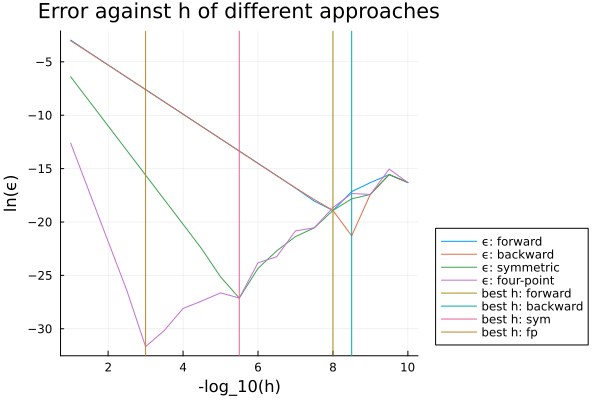

In [18]:
hs::Vector = 1.0:0.5:10.0

plot(
    hs,
    log.(err_forward),
    xlabel="-log_10(h)",
    ylabel="ln(ϵ)",
    label="ϵ: forward",
    title="Error against h of different approaches",
    legend=:outerbottomright,
)
plot!(hs, log.(err_backward), label="ϵ: backward")
plot!(hs, log.(err_sym), label="ϵ: symmetric")
plot!(hs, log.(err_fp), label="ϵ: four-point")
vline!([-log10(best_h_forward)], label="best h: forward")
vline!([-log10(best_h_backward)], label="best h: backward")
vline!([-log10(best_h_sym)], label="best h: sym")
vline!([-log10(best_h_fp)], label="best h: fp")

Let's replicate onto another function $f(x)$ and see does it works. Let's use the old one $f(x) = 3x^2 - x + 1$.

In [18]:
f(x::Number)::Number = 3.0 * x^2.0 - x + 1.0
df(x::Number)::Number = 6.0 * x - 1
x::Number = 2.1

(
    err_forward,
    err_backward,
    err_sym,
    min_err_forward,
    min_err_backward,
    min_err_sym,
    best_h_forward,
    best_h_backward,
    best_h_sym,
) = the_best_h(f, df, x)

println("Forward: h=$best_h_forward, ϵ=$min_err_forward")
println("Backward: h=$best_h_backward, ϵ=$min_err_backward")
println("Symmetry: h=$best_h_sym, ϵ=$min_err_sym")

Forward: h=3.162277660168379e-8, ϵ=4.195290092335151e-9
Backward: h=3.162277660168379e-8, ϵ=1.5174825534078816e-8
Symmetry: h=3.162277660168379e-8, ϵ=1.5174825534078816e-8


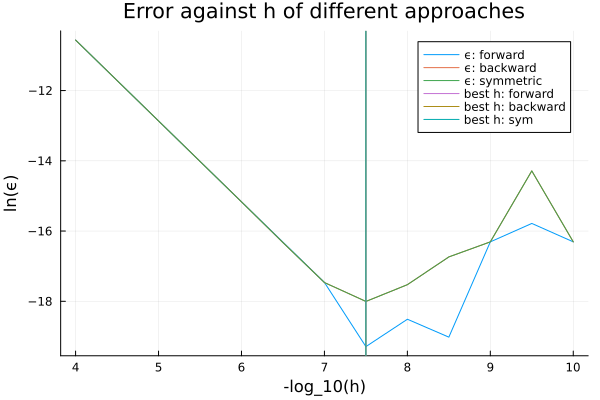

In [19]:
hs::Vector = 4.0:0.5:10.0

plot(
    hs,
    log.(err_forward),
    xlabel="-log_10(h)",
    ylabel="ln(ϵ)",
    label="ϵ: forward",
    title="Error against h of different approaches"
)
plot!(hs, log.(err_backward), label="ϵ: backward")
plot!(hs, log.(err_sym), label="ϵ: symmetric")
vline!([-log10(best_h_forward)], label="best h: forward")
vline!([-log10(best_h_backward)], label="best h: backward")
vline!([-log10(best_h_sym)], label="best h: sym")

Though the best $h$ are slightly different, the value is approximately **`h = 1.9109529749704404e-8`** and **`h = 6.042963902381328e-9`** using **the symmetric approach**.

Compare with the result when $h^* = 2\sqrt\epsilon$

In [20]:
h1::Number = 1.9109529749704404e-8
h2::Number = 6.042963902381328e-9

f(x::Number)::Number = 3.0 * x^2.0 - x + 1.0
x::Number = 2.1
exact::Number = 6.0 * x - 1

with_h232::Number = sym_diff(f, x, 2^-32)
with_h1::Number = sym_diff(f, x, h1)
with_h2::Number = sym_diff(f, x, h2)
hstar1::Number = 2.0 * sqrt(abs(with_h1 - exact) / abs(exact))
hstar2::Number = 2.0 * sqrt(abs(with_h2 - exact) / abs(exact))
with_hstar1::Number = sym_diff(f, x, hstar1)
with_hstar2::Number = sym_diff(f, x, hstar2)

println("Test on f(x) = 3x^2 - x + 1 => f'($x) = $exact")
println("f'(2.1) when h=2^-32 = $with_h232 | ϵ = $(abs(with_h232 - exact) / abs(exact))")
println("f'(2.1) when h=h_1^* = $with_hstar1 | ϵ = $(abs(with_hstar1 - exact) / abs(exact))")
println("f'(2.1) when h=h_2^* = $with_hstar2 | ϵ = $(abs(with_hstar2 - exact) / abs(exact))")
println("f'(2.1) when h=h1    = $with_h1 | ϵ = $(abs(with_h1 - exact) / abs(exact))")
println("f'(2.1) when h=h2    = $with_h2 | ϵ = $(abs(with_h2 - exact) / abs(exact))")

Test on f(x) = 3x^2 - x + 1 => f'(2.1) = 11.600000000000001
f'(2.1) when h=2^-32 = 11.600006103515625 | ϵ = 5.261651399636995e-7
f'(2.1) when h=h_1^* = 11.59999999999608 | ϵ = 3.3812033632722003e-13
f'(2.1) when h=h_2^* = 11.599999999991443 | ϵ = 7.378006251922764e-13
f'(2.1) when h=h1    = 11.600000089517989 | ϵ = 7.717067904240655e-9
f'(2.1) when h=h2    = 11.600000008960333 | ϵ = 7.724423399763665e-10


In [21]:
h1::Number = 1.9109529749704404e-8
h2::Number = 6.042963902381328e-9

f(x::Number)::Number = ℯ^x
x::Number = 0.0
exact::Number = ℯ^x

with_h232::Number = sym_diff(f, x, 2^-32)
with_h1::Number = sym_diff(f, x, h1)
with_h2::Number = sym_diff(f, x, h2)
hstar1::Number = 2.0 * sqrt(abs(with_h1 - exact) / abs(exact))
hstar2::Number = 2.0 * sqrt(abs(with_h2 - exact) / abs(exact))
with_hstar1::Number = sym_diff(f, x, hstar1)
with_hstar2::Number = sym_diff(f, x, hstar2)

println("Test on f(x) = e^x => f'($x) = $exact")
println("f'(2.1) when h=2^-32 = $with_h232 | ϵ = $(abs(with_h232 - exact) / abs(exact))")
println("f'(2.1) when h=h_1^* = $with_hstar1 | ϵ = $(abs(with_hstar1 - exact) / abs(exact))")
println("f'(2.1) when h=h_2^* = $with_hstar2 | ϵ = $(abs(with_hstar2 - exact) / abs(exact))")
println("f'(2.1) when h=h1    = $with_h1 | ϵ = $(abs(with_h1 - exact) / abs(exact))")
println("f'(2.1) when h=h2    = $with_h2 | ϵ = $(abs(with_h2 - exact) / abs(exact))")

Test on f(x) = e^x => f'(0.0) = 1.0
f'(2.1) when h=2^-32 = 1.0 | ϵ = 0.0
f'(2.1) when h=h_1^* = 1.0000000004645986 | ϵ = 4.6459858182856806e-10
f'(2.1) when h=h_2^* = 1.0000000005149288 | ϵ = 5.149287662931101e-10
f'(2.1) when h=h1    = 0.9999999993028934 | ϵ = 6.971065946714816e-10
f'(2.1) when h=h2    = 1.0000000007724426 | ϵ = 7.72442554364261e-10


Therefore, the result can be fluctuated and really depend on various situations. $h^*$ can still be used, but here `hstar1` gives the best result.

In [22]:
println(h1)
println(h2)
println(hstar1)
println(hstar2)

1.9109529749704404e-8
6.042963902381328e-9
5.280555253650819e-5
5.5585701555859166e-5


## Differentiation on a sample of data

The idea is:

1. Using interpolation to create a representative function of such the sample data
2. Then calculate the derivative of that function instead.

We will implement spline interpolation for this purpose.

In [23]:
using LinearAlgebra

In [24]:
function calculateZ(Xs::Vector{Float64}, Ys::Vector{Float64}, n::Int64)::Vector{Float64}
    du::Vector{Float64} = []  # upper diag elements
    dd::Vector{Float64} = []
    dl::Vector{Float64} = []
    
    Y::Matrix{Float64} = zeros(Float64, n - 2, 1)
    
    # push elements into du dd dl
    # $h_i = t_{i+1} - t_i$
    for i in 1:n-2
        if i > 1
            h = Xs[i] - Xs[i - 1]
            push!(dl, h / 6.0)
        end
        if i < n - 2
            h = Xs[i + 2] - Xs[i + 1]
            push!(du, h / 6.0)
        end
        h1_h2 = Xs[i + 2] - Xs[i]
        push!(dd, h1_h2 / 3.0)
        
        Y[i, 1] = (Ys[i + 2] - Ys[i + 1]) / (Xs[i + 2] - Xs[i + 1]) - (Ys[i + 1] - Ys[i]) / (Xs[i + 1] - Xs[i])
    end
    
    # build H
    H::Tridiagonal{Float64, Vector{Float64}} = Tridiagonal(dl, dd, du)
    
    # calculate Z
    Zmat::Matrix{Float64} = inv(H) * Y
    Z::Vector{Float64} = vec(Zmat)
    
    push!(Z, 0.0)
    pushfirst!(Z, 0.0)
    
    return Z
end

calculateZ (generic function with 1 method)

In [25]:
function splineInterpolation(data::Dict{Float64, Float64}, x::Float64)::Float64
    # determine which interval x is in
    Xs::Vector{Float64} = sort(collect(keys(data)))
    Ys::Vector{Float64} = [data[i] for i in Xs]
    n::Int64 = length(Xs)
    
    Z::Vector{Float64} = calculateZ(Xs, Ys, n)
    
    for i in 1:n-1
        if (i == 1 && x < Xs[i]) || Xs[i] <= x < Xs[i + 1] || (i == n - 1 && x >= Xs[i])
            h = Xs[i + 1] - Xs[i]
            return Z[i + 1] / 6.0 / h * (x - Xs[i])^3.0 + Z[i] / 6.0 / h * (Xs[i + 1] - x)^3 + (Ys[i + 1] / h - (Z[i + 1] * h) / 6.0) * (x - Xs[i]) + (Ys[i] / h - Z[i] * h / 6.0) * (Xs[i + 1] - x)
        end
    end
    
    return Nothing
end

splineInterpolation (generic function with 1 method)

Provide a sample data.

In [26]:
mySample::Dict{Float64, Float64} = Dict(
    0.0 => -2.0,
    1.0 => 2.0,
    2.0 => -1.0,
    3.0 => 1.0,
    4.0 => 0.0,
)

Dict{Float64, Float64} with 5 entries:
  0.0 => -2.0
  4.0 => 0.0
  2.0 => -1.0
  3.0 => 1.0
  1.0 => 2.0

Plot the spline interpolation.

In [27]:
using Plots

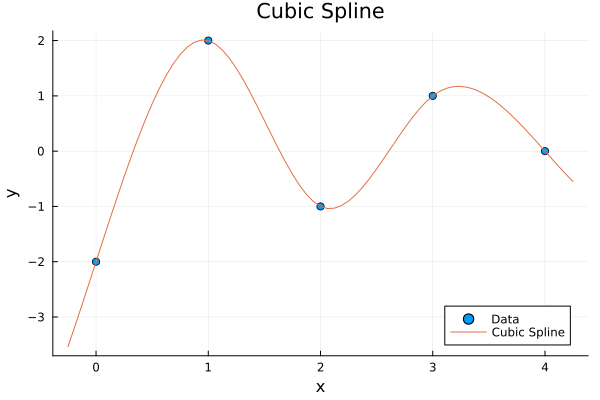

In [28]:
Xreal = collect(keys(mySample))
Yreal = [mySample[x] for x in Xreal]

Xhat = -0.25:0.0625:4.25
Yhat = [splineInterpolation(mySample, x) for x in Xhat]

scatter(Xreal, Yreal, title="Cubic Spline", label="Data", xlabel="x", ylabel="y")
plot!(Xhat, Yhat, label="Cubic Spline")

Implement `ForwardDiff.derivative(f, x)` and plot the derivative graph.

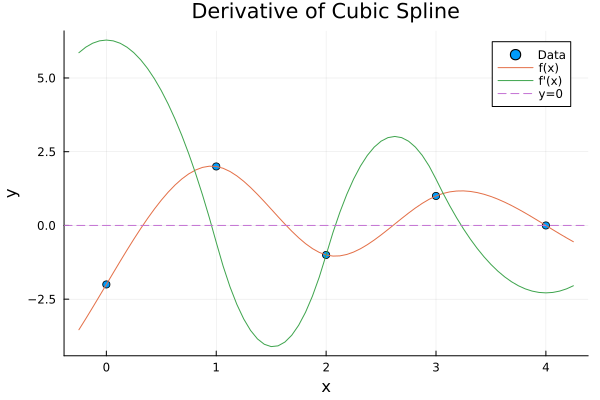

In [29]:
Xreal = collect(keys(mySample))
Yreal = [mySample[x] for x in Xreal]

Xhat = -0.25:0.0625:4.25
Yhat = [splineInterpolation(mySample, x) for x in Xhat]
Yhatprime = [sym_diff((xx) -> splineInterpolation(mySample, xx), x, hstar1) for x in Xhat]

scatter(Xreal, Yreal, label="Data", title="Derivative of Cubic Spline", xlabel="x", ylabel="y")
plot!(Xhat, Yhat, label="f(x)")
plot!(Xhat, Yhatprime, label="f'(x)")
hline!([0.0], label="y=0", linestyle=:dash)

As you can see, when $f(x)$ line reaches extrema, $f'(x)$ will become zero. Thus, this method works.